In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycountry import countries
import openpyxl

In [27]:
df = pd.read_csv('netflix_titles.csv')

In [28]:
#get all the unique ratings
total_ratings = df['rating'].unique()

In [29]:
shape = df.shape

In [30]:
#incorrect readings array
incorr_rating = ['74 min', '84 min', '66 min']

In [31]:
#remove incorrect ratings
df.loc[df['rating'].isin(incorr_rating), 'rating'] = np.nan

In [32]:
#running this command again to check if they are removed
total_ratings = df['rating'].unique()
total_ratings

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [33]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [34]:
#drop the 'description' column since we dont need it for our analysis
df.drop(columns=['description'], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies'),
  Text(10, 0, 'TV Comedies'),
  Text(11, 0, 'Thrillers'),
  Text(12, 0, 'Crime TV Shows'),
  Text(13, 0, "Kids' TV"),
  Text(14, 0, 'Docuseries'),
  Text(15, 0, 'Music & Musicals'),
  Text(16, 0, 'Romantic TV Shows'),
  Text(17, 0, 'Horror Movies'),
  Text(18, 0, 'Stand-Up Comedy'),
  Text(19, 0, 'Reality TV'),
  Text(20, 0, 'British TV Shows'),
  Text(21, 0, 'Sci-Fi & Fantasy'),
  Text(22, 0, 'Sports Movies'),
  Text(23, 0, 'Anime Series'),
  Text(24, 0, 'Spanish-Lang

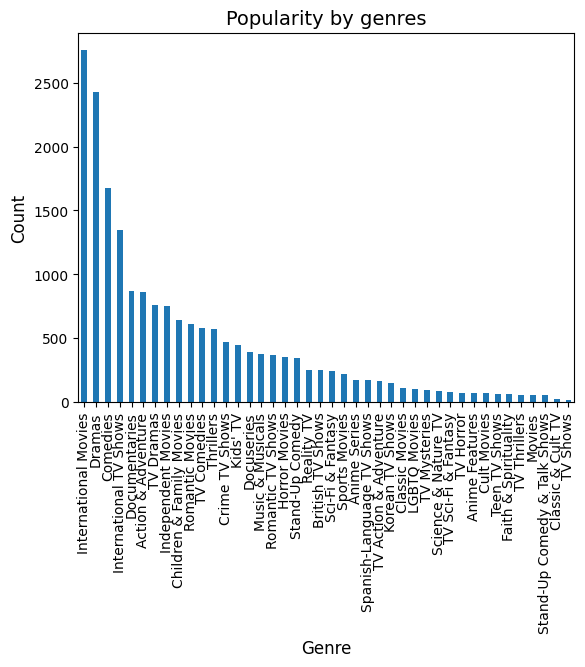

In [35]:
#analysis 1, plotting by genres

#drop all the missing values from 'listed_in' column
df = df.dropna(subset=['listed_in'])

#split each row by comma and explode into different rows and store the count of different genres in genre_count
genres = df['listed_in'].str.split(', ').explode()
genre_count = genres.value_counts()

#plot the genre_counts
genre_count.plot(kind='bar')

plt.xlabel("Genre", fontsize=12)  
plt.ylabel("Count", fontsize=12)  
plt.title("Popularity by genres", fontsize=14)
plt.xticks(rotation=90)


In [36]:
#cleaning the countries column
valid_countries = set(c.name for c in countries) 
valid_countries.update(["South Korea", "United Kingdom", "Hong Kong", "United States"])
def is_invalid_country(value):
    if pd.isna(value):
        return False
    country_list = [c.strip() for c in value.split(',')]
    return not all(c in valid_countries for c in country_list)

df.loc[df['country'].apply(is_invalid_country), 'country'] = pd.NA


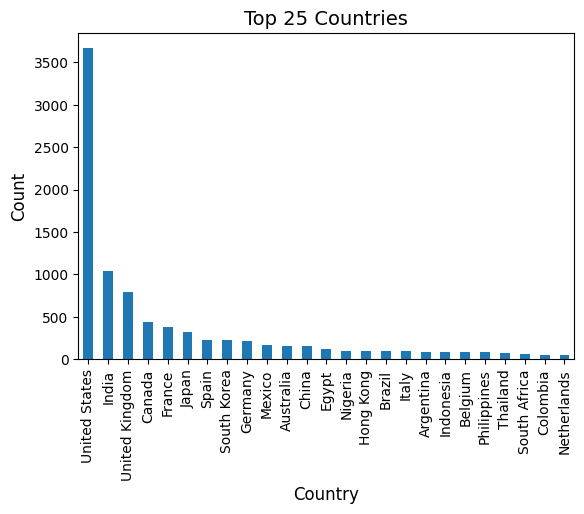

In [37]:
#analysis 2, plotting by countries

#drop all the missing values from 'country' column
df = df.dropna(subset=['country'])

#split each row by comma and explode into different rows and store the count of different countries in country
countries_list = df['country'].str.split(', ').explode()
country_count = countries_list.value_counts()

#plot the country_count
country_count.head(25).plot(kind='bar')

plt.xlabel("Country", fontsize=12)  
plt.ylabel("Count", fontsize=12)  
plt.title("Top 25 Countries", fontsize=14)
plt.xticks(rotation=90)
plt.margins(x=0.02)
plt.subplots_adjust(bottom=0.2)


In [38]:
#create a new column year_added
df['year_added'] = df['date_added'].str[-4:]
df['year_added'] = df['year_added'].fillna(0).astype(int)
df['release_year'] = df['release_year'].fillna(0).astype(int)

In [61]:
#reset index
#df.reset_index(inplace= True)

In [73]:
#average movie duration (in mins)
duration_in_int = df[df['type'] == 'Movie']['duration'].str[:-4]
duration_in_int = duration_in_int.fillna(0).astype(int)
average_dur = duration_in_int.mean()
average_dur

100.31151690471886

In [76]:
#average seasons in a TV show
seasons_in_int = df[df['type'] == 'TV Show']['duration'].str[:-7]
seasons_in_int = seasons_in_int.fillna(0).astype(int)
average_seasons = seasons_in_int.mean()
average_seasons

1.8925428439092171

<Axes: title={'center': 'Content Rating Distribution'}, xlabel='rating'>

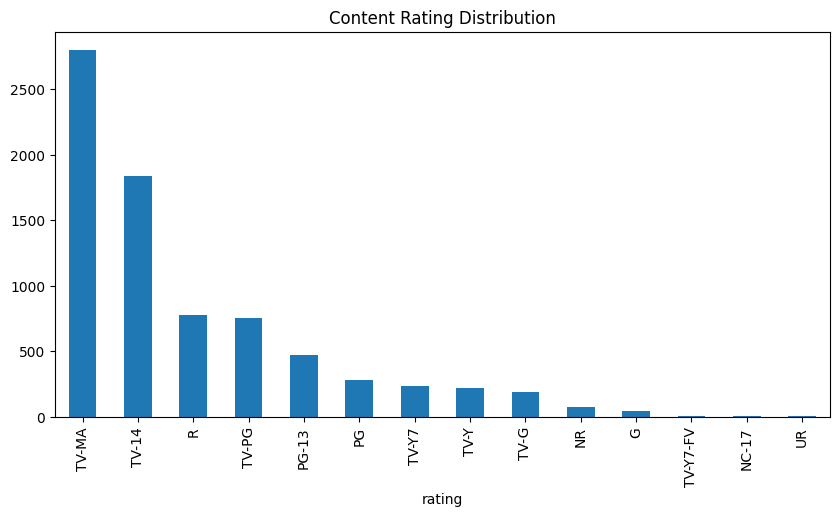

In [78]:
#ratings distribution
df['rating'].value_counts().plot(kind='bar', figsize=(10,5), title="Content Rating Distribution")


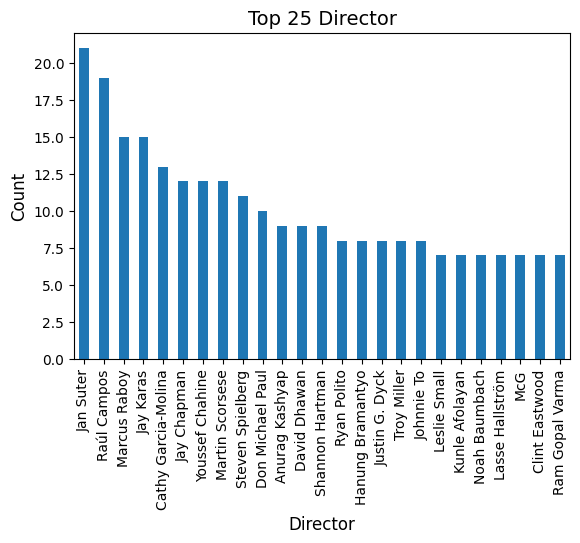

In [101]:
#top 25 most occuring directors

directors_list = df['director'].str.split(', ').explode()
director_count = directors_list.value_counts()

director_count.head(25).plot(kind='bar')

plt.xlabel("Director", fontsize=12)  
plt.ylabel("Count", fontsize=12)  
plt.title("Top 25 Director", fontsize=14)
plt.xticks(rotation=90)
plt.margins(x=0.02)
plt.subplots_adjust(bottom=0.2)


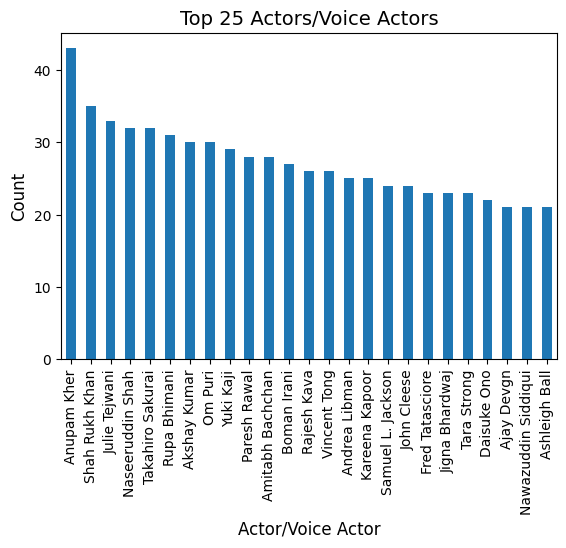

In [100]:
#top 25 most occuring actors/voice actors

df2 = pd.read_csv('netflix_titles.csv')

casts_list = df['cast'].str.split(', ').explode().dropna().str.strip()
cast_count = casts_list.value_counts()

cast_count.head(25).plot(kind='bar')

plt.xlabel("Actor/Voice Actor", fontsize=12)  
plt.ylabel("Count", fontsize=12)  
plt.title("Top 25 Actors/Voice Actors", fontsize=14)
plt.xticks(rotation=90)
plt.margins(x=0.02)
plt.subplots_adjust(bottom=0.2)